In [7]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp /content/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 9.54MB/s]


In [6]:
from zipfile import ZipFile
file_name = "/content/pima-indians-diabetes-database.zip"
with ZipFile(file_name , 'r')as zip:
  zip.extractall()
  print('done')

done


># importing Libraries

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

In [11]:
datasets=pd.read_csv("/content/diabetes.csv")

In [12]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
print(datasets["Outcome"])

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [13]:
datasets.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

># splitting Data

In [29]:
x=datasets.iloc[:,:-1]
y=datasets.iloc[:,[-1]]


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

># Model

In [37]:
classifier=RandomForestClassifier(n_estimators=6,criterion="entropy",random_state=0)


In [36]:
print(x_train.shape)
print(y_train.shape)

(614, 8)
(614, 1)


In [39]:
classifier.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(criterion='entropy', n_estimators=6, random_state=0)

In [40]:
y_pred=classifier.predict(x_test)

># Evalution

In [41]:
cm=confusion_matrix(y_test,y_pred)

In [43]:
print("Acuuracy:",classifier.score(x_test,y_test))

Acuuracy: 0.7662337662337663


In [46]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
import scikitplot as skplt

In [48]:
import matplotlib.pyplot as plt


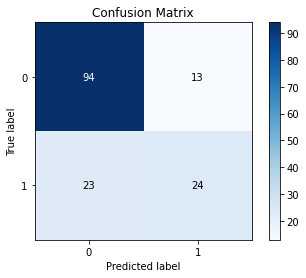

In [49]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=False)
plt.show()

In [53]:
print("new prediction:",classifier.predict([[6,142,72,45,0,38,6,0.627]]))

new prediction: [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
